In [1]:
import os
CWD = os.getcwd()

In [239]:
import pandas as pd
df = pd.read_csv(CWD[:-10] + "/data/processed/train/oidium-train.csv", skiprows = [0], encoding='latin-1')

In [240]:
df.tail()

,Datum,Tmin,Tavg,Tmax,Niederschlag,OidiumIndex,Stadienspez. Anfaelligkeit,OidiumTageswert,BlattflÃÂ¤che,BlattflaecheImWachstum,Blattanzahl,BBCHStadium,DayMonth
2542,26.12.2020,-2.05,0.460277777778,4.66,0,0,0,0,0,0,0,0,26.12
2543,27.12.2020,-0.73,4.308888888889,8.76,0.8,0,0,0,0,0,0,0,27.12
2544,28.12.2020,3.37,5.388055555556,8.18,9.9,0,0,0,0,0,0,0,28.12
2545,29.12.2020,4.23,5.18375,6.48,0.7,0,0,0,0,0,0,0,29.12
2546,30.12.2020,2.76,3.754930555556,5.26,0,0,0,0,0,0,0,0,30.12


In [241]:
df['Datum']

0       01.01.2013
1       02.01.2013
2       03.01.2013
3       04.01.2013
4       05.01.2013
           ...    
2542    26.12.2020
2543    27.12.2020
2544    28.12.2020
2545    29.12.2020
2546    30.12.2020
Name: Datum, Length: 2547, dtype: object

In [242]:
drop = []
for enum, i in enumerate(df['Datum']):
    if 'Datum' in i:
        drop.append(enum - 1)
        drop.append(enum)
print(drop)

[362, 363, 726, 727, 1090, 1091, 1454, 1455, 1818, 1819, 2182, 2183]


In [243]:
df.drop(drop,
       axis=0,
       inplace=True)

In [244]:
df.drop('DayMonth',
       axis=1,
       inplace=True)

In [245]:
tmp = pd.to_datetime(df['Datum'])

In [246]:
df['Datum'] = tmp

In [247]:
df = df.set_index("Datum")
df.head()

,Tmin,Tavg,Tmax,Niederschlag,OidiumIndex,Stadienspez. Anfaelligkeit,OidiumTageswert,BlattflÃÂ¤che,BlattflaecheImWachstum,Blattanzahl,BBCHStadium
Datum,,,,,,,,,,,
2013-01-01,1.69,5.4125,7.99,4,0,0,0,0,0,0,0
2013-02-01,-0.3,3.900555555556,8.34,0.1,0,0,0,4,4,1,11
2013-03-01,-1.37,3.484166666667,6.81,0,0,0,0,4,4,1,11
2013-04-01,5.99,7.194791666667,8.33,0,0,0,0,4,4,1,11
2013-05-01,5.2,6.660277777778,7.69,0.1,0,0,0,4,4,1,11


In [248]:
df['year'] = df.index.year
df['month'] = df.index.month
df['weekday'] = df.index.weekday

In [249]:
df.head()

,Tmin,Tavg,Tmax,Niederschlag,OidiumIndex,Stadienspez. Anfaelligkeit,OidiumTageswert,BlattflÃÂ¤che,BlattflaecheImWachstum,Blattanzahl,BBCHStadium,year,month,weekday
Datum,,,,,,,,,,,,,,
2013-01-01,1.69,5.4125,7.99,4,0,0,0,0,0,0,0,2013,1,1
2013-02-01,-0.3,3.900555555556,8.34,0.1,0,0,0,4,4,1,11,2013,2,4
2013-03-01,-1.37,3.484166666667,6.81,0,0,0,0,4,4,1,11,2013,3,4
2013-04-01,5.99,7.194791666667,8.33,0,0,0,0,4,4,1,11,2013,4,0
2013-05-01,5.2,6.660277777778,7.69,0.1,0,0,0,4,4,1,11,2013,5,2


In [250]:
import sklearn.metrics as metrics

def regression_results(y_true, y_pred):
    explained_variance=metrics.explained_variance_score(y_true, y_pred)
    mean_absolute_error=metrics.mean_absolute_error(y_true, y_pred) 
    mse=metrics.mean_squared_error(y_true, y_pred) 
    mean_squared_log_error=metrics.mean_squared_log_error(y_true, y_pred)
    median_absolute_error=metrics.median_absolute_error(y_true, y_pred)
    r2=metrics.r2_score(y_true, y_pred)    
    print('explained_variance: ', round(explained_variance,4))    
    print('mean_squared_log_error: ', round(mean_squared_log_error,4))
    print('r2: ', round(r2,4))
    print('MAE: ', round(mean_absolute_error,4))
    print('MSE: ', round(mse,4))
    print('RMSE: ', round(np.sqrt(mse),4))

In [251]:
df.loc[:,'PreviousIndex'] = df.loc[:,'OidiumIndex'].astype(float).shift()
df.loc[:,'IndexDelta'] = df.loc[:,'PreviousIndex'].diff()

In [252]:
df.columns

Index(['Tmin', 'Tavg', 'Tmax', 'Niederschlag', 'OidiumIndex',
       'Stadienspez. Anfaelligkeit', 'OidiumTageswert', 'BlattflÃÂ¤che',
       'BlattflaecheImWachstum', 'Blattanzahl', 'BBCHStadium', 'year', 'month',
       'weekday', 'PreviousIndex', 'IndexDelta'],
      dtype='object')

In [253]:
for i in df.columns:
    if i not in ['year', 'weekday', 'month']:
        df[i] = df[i].astype(np.float32)

In [254]:
df.tail()

,Tmin,Tavg,Tmax,Niederschlag,OidiumIndex,Stadienspez. Anfaelligkeit,OidiumTageswert,BlattflÃÂ¤che,BlattflaecheImWachstum,Blattanzahl,BBCHStadium,year,month,weekday,PreviousIndex,IndexDelta
Datum,,,,,,,,,,,,,,,,
2020-12-26,-2.05,0.460278,4.66,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2020,12,5,0.0,0.0
2020-12-27,-0.73,4.308889,8.76,0.8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2020,12,6,0.0,0.0
2020-12-28,3.37,5.388055,8.18,9.9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2020,12,0,0.0,0.0
2020-12-29,4.23,5.183750,6.48,0.7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2020,12,1,0.0,0.0
2020-12-30,2.76,3.754930,5.26,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2020,12,2,0.0,0.0


In [255]:
X_train = df.drop(['OidiumIndex'], axis = 1)
y_train = df['OidiumIndex']

In [256]:
y_train

Datum
2013-01-01    0.0
2013-02-01    0.0
2013-03-01    0.0
2013-04-01    0.0
2013-05-01    0.0
             ... 
2020-12-26    0.0
2020-12-27    0.0
2020-12-28    0.0
2020-12-29    0.0
2020-12-30    0.0
Name: OidiumIndex, Length: 2535, dtype: float32

In [257]:
test_df = pd.read_csv(CWD[:-10] + "/data/processed/test/oidium2021.csv", skiprows = [0], encoding='latin-1')

In [258]:
test_df.tail()

,time,Datum,Tmin,Tavg,Tmax,Niederschlag,Feuchte,OidiumIndex,Stadienspez. Anfaelligkeit,OidiumTageswert,Blattfläche,BlattflaecheImWachstum,Blattanzahl,BBCHStadium,DayMonth
282,10.10.2021 23:00:00,10.10.2021,2.32,8.001667,14.36,0.0,72.083333,0.0,0.2,0.0,3880.3,0.0,34,89,10.1
283,11.10.2021 23:00:00,11.10.2021,2.52,8.024583,14.32,0.0,72.041667,0.0,0.2,0.0,3880.3,0.0,34,89,11.1
284,12.10.2021 23:00:00,12.10.2021,4.36,8.205833,12.12,0.8,79.125000,0.0,0.2,0.0,3880.3,0.0,34,89,12.1
285,13.10.2021 23:00:00,13.10.2021,3.79,7.701250,12.03,0.9,80.125000,0.0,0.2,0.0,3880.3,0.0,34,89,13.1
286,14.10.2021 23:00:00,14.10.2021,5.09,8.786667,13.77,0.0,79.291667,0.0,0.2,0.0,3880.3,0.0,34,89,14.1


In [259]:
test_df['Datum']

0      01.01.2021
1      02.01.2021
2      03.01.2021
3      04.01.2021
4      05.01.2021
          ...    
282    10.10.2021
283    11.10.2021
284    12.10.2021
285    13.10.2021
286    14.10.2021
Name: Datum, Length: 287, dtype: object

In [260]:
drop = []
for enum, i in enumerate(test_df['Datum']):
    if 'Datum' in i:
        drop.append(enum - 1)
        drop.append(enum)
print(drop)

[]


In [261]:
test_df.drop(drop,
       axis=0,
       inplace=True)

In [262]:
tmp = pd.to_datetime(test_df['Datum'])

In [263]:
test_df['Datum'] = tmp

In [264]:
test_df = test_df.set_index("Datum")
test_df.head()

,time,Tmin,Tavg,Tmax,Niederschlag,Feuchte,OidiumIndex,Stadienspez. Anfaelligkeit,OidiumTageswert,Blattfläche,BlattflaecheImWachstum,Blattanzahl,BBCHStadium,DayMonth
Datum,,,,,,,,,,,,,,
2021-01-01,01.01.2021 23:50:00,1.55,2.577361,4.00,1.7,90.715278,0.0,0.0,0.0,0.0,0.0,0,0,1.01
2021-02-01,02.01.2021 23:50:00,0.88,1.275000,1.99,0.0,91.847222,0.0,0.0,0.0,0.0,0.0,0,0,2.01
2021-03-01,03.01.2021 23:50:00,-0.56,0.207014,0.94,0.5,95.541667,0.0,0.0,0.0,0.0,0.0,0,0,3.01
2021-04-01,04.01.2021 23:50:00,-1.98,0.440694,1.79,0.0,93.972222,0.0,0.0,0.0,0.0,0.0,0,0,4.01
2021-05-01,05.01.2021 23:50:00,-0.29,0.166181,0.66,0.0,91.006944,0.0,0.0,0.0,0.0,0.0,0,0,5.01


In [265]:
test_df['year'] = test_df.index.year
test_df['month'] = test_df.index.month
test_df['weekday'] = test_df.index.weekday

In [266]:
test_df.head()

,time,Tmin,Tavg,Tmax,Niederschlag,Feuchte,OidiumIndex,Stadienspez. Anfaelligkeit,OidiumTageswert,Blattfläche,BlattflaecheImWachstum,Blattanzahl,BBCHStadium,DayMonth,year,month,weekday
Datum,,,,,,,,,,,,,,,,,
2021-01-01,01.01.2021 23:50:00,1.55,2.577361,4.00,1.7,90.715278,0.0,0.0,0.0,0.0,0.0,0,0,1.01,2021,1,4
2021-02-01,02.01.2021 23:50:00,0.88,1.275000,1.99,0.0,91.847222,0.0,0.0,0.0,0.0,0.0,0,0,2.01,2021,2,0
2021-03-01,03.01.2021 23:50:00,-0.56,0.207014,0.94,0.5,95.541667,0.0,0.0,0.0,0.0,0.0,0,0,3.01,2021,3,0
2021-04-01,04.01.2021 23:50:00,-1.98,0.440694,1.79,0.0,93.972222,0.0,0.0,0.0,0.0,0.0,0,0,4.01,2021,4,3
2021-05-01,05.01.2021 23:50:00,-0.29,0.166181,0.66,0.0,91.006944,0.0,0.0,0.0,0.0,0.0,0,0,5.01,2021,5,5


In [267]:
test_df.loc[:,'PreviousIndex'] = test_df.loc[:,'OidiumIndex'].astype(float).shift()
test_df.loc[:,'IndexDelta'] = test_df.loc[:,'PreviousIndex'].diff()

In [268]:
test_df.tail()

,time,Tmin,Tavg,Tmax,Niederschlag,Feuchte,OidiumIndex,Stadienspez. Anfaelligkeit,OidiumTageswert,Blattfläche,BlattflaecheImWachstum,Blattanzahl,BBCHStadium,DayMonth,year,month,weekday,PreviousIndex,IndexDelta
Datum,,,,,,,,,,,,,,,,,,,
2021-10-10,10.10.2021 23:00:00,2.32,8.001667,14.36,0.0,72.083333,0.0,0.2,0.0,3880.3,0.0,34,89,10.1,2021,10,6,0.0,0.0
2021-11-10,11.10.2021 23:00:00,2.52,8.024583,14.32,0.0,72.041667,0.0,0.2,0.0,3880.3,0.0,34,89,11.1,2021,11,2,0.0,0.0
2021-12-10,12.10.2021 23:00:00,4.36,8.205833,12.12,0.8,79.125000,0.0,0.2,0.0,3880.3,0.0,34,89,12.1,2021,12,4,0.0,0.0
2021-10-13,13.10.2021 23:00:00,3.79,7.701250,12.03,0.9,80.125000,0.0,0.2,0.0,3880.3,0.0,34,89,13.1,2021,10,2,0.0,0.0
2021-10-14,14.10.2021 23:00:00,5.09,8.786667,13.77,0.0,79.291667,0.0,0.2,0.0,3880.3,0.0,34,89,14.1,2021,10,3,0.0,0.0


In [272]:
test_df.drop('time',
             axis=1,
             inplace=True)

In [274]:
for i in test_df.columns:
    if i not in ['year', 'weekday', 'month']:
        test_df[i] = test_df[i].astype(np.float32)

In [275]:
X_test = test_df.drop(['OidiumIndex'], axis = 1)
y_test = test_df['OidiumIndex']

In [276]:
y_test

Datum
2021-01-01    0.0
2021-02-01    0.0
2021-03-01    0.0
2021-04-01    0.0
2021-05-01    0.0
             ... 
2021-10-10    0.0
2021-11-10    0.0
2021-12-10    0.0
2021-10-13    0.0
2021-10-14    0.0
Name: OidiumIndex, Length: 287, dtype: float32

In [277]:
y_test = y_test.fillna(0)
y_train = y_train.fillna(0)
X_test = X_test.fillna(0)
X_train = X_train.fillna(0)

In [278]:
print(len(y_test))
print(len(X_test))
print(len(y_train))
print(len(X_train))

287
287
2535
2535


In [279]:
from sklearn.neural_network import MLPRegressor
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt

LR: 0.995800 (0.002535)


/home/jinen/git/pier-11/glomimo/venv/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/home/jinen/git/pier-11/glomimo/venv/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/home/jinen/git/pier-11/glomimo/venv/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWa

NN: 0.938209 (0.102237)


/home/jinen/git/pier-11/glomimo/venv/lib/python3.9/site-packages/sklearn/base.py:441: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  warnings.warn(


KNN: 0.317187 (1.794423)
RF: 0.964563 (0.086780)
SVR: -0.296480 (0.327565)


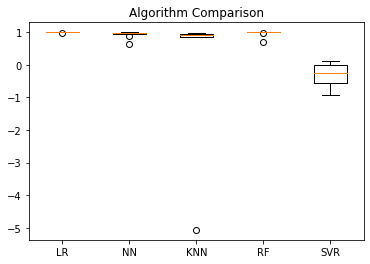

In [280]:
models = []
models.append(('LR', LinearRegression()))
models.append(('NN', MLPRegressor(solver = 'lbfgs')))  #neural network
models.append(('KNN', KNeighborsRegressor())) 
models.append(('RF', RandomForestRegressor(n_estimators = 10))) # Ensemble method - collection of many decision trees
models.append(('SVR', SVR(gamma='auto'))) # kernel = linear# Evaluate each model in turn
results = []
names = []
for name, model in models:
    # TimeSeries Cross validation
 tscv = TimeSeriesSplit(n_splits=10)
    
 cv_results = cross_val_score(model, X_train, y_train, cv=tscv, scoring='r2')
 results.append(cv_results)
 names.append(name)
 print('%s: %f (%f)' % (name, cv_results.mean(), cv_results.std()))
    
# Compare Algorithms
plt.boxplot(results, labels=names)
plt.title('Algorithm Comparison')
plt.show()